# **YOLO ALGORITHM**
## ASSIGNMENT(02-08-2024)-HARITHA P V

In [82]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import time
import os
from google.colab.patches import cv2_imshow

In [83]:
# Paths to YOLO files
weights_path = '/content/drive/MyDrive/YOLO/archive (3)/yolov3.weights'
configuration_path = '/content/drive/MyDrive/YOLO/archive (3)/yolov3.cfg'
image_path = '/content/drive/MyDrive/YOLO/archive (3)/cat dog.jpg'

In [84]:
print("Configuration path exists:", os.path.exists(configuration_path))
print("Weights path exists:", os.path.exists(weights_path))

Configuration path exists: True
Weights path exists: True


In [85]:
# Load YOLO
net = cv2.dnn.readNetFromDarknet(configuration_path, weights_path)

In [86]:
# Get names of all layers
layer_names = net.getLayerNames()
output_layer_indices = net.getUnconnectedOutLayers()
output_layers = [layer_names[i - 1] for i in output_layer_indices]  # Convert indices to names

print("Layer names:", layer_names)
print("Output layer indices:", output_layer_indices)
print("Output layer names:", output_layers)

Layer names: ('conv_0', 'bn_0', 'leaky_1', 'conv_1', 'bn_1', 'leaky_2', 'conv_2', 'bn_2', 'leaky_3', 'conv_3', 'bn_3', 'leaky_4', 'shortcut_4', 'conv_5', 'bn_5', 'leaky_6', 'conv_6', 'bn_6', 'leaky_7', 'conv_7', 'bn_7', 'leaky_8', 'shortcut_8', 'conv_9', 'bn_9', 'leaky_10', 'conv_10', 'bn_10', 'leaky_11', 'shortcut_11', 'conv_12', 'bn_12', 'leaky_13', 'conv_13', 'bn_13', 'leaky_14', 'conv_14', 'bn_14', 'leaky_15', 'shortcut_15', 'conv_16', 'bn_16', 'leaky_17', 'conv_17', 'bn_17', 'leaky_18', 'shortcut_18', 'conv_19', 'bn_19', 'leaky_20', 'conv_20', 'bn_20', 'leaky_21', 'shortcut_21', 'conv_22', 'bn_22', 'leaky_23', 'conv_23', 'bn_23', 'leaky_24', 'shortcut_24', 'conv_25', 'bn_25', 'leaky_26', 'conv_26', 'bn_26', 'leaky_27', 'shortcut_27', 'conv_28', 'bn_28', 'leaky_29', 'conv_29', 'bn_29', 'leaky_30', 'shortcut_30', 'conv_31', 'bn_31', 'leaky_32', 'conv_32', 'bn_32', 'leaky_33', 'shortcut_33', 'conv_34', 'bn_34', 'leaky_35', 'conv_35', 'bn_35', 'leaky_36', 'shortcut_36', 'conv_37', 'bn

In [87]:
# Check output layer names
print("Output layer names:", output_layers)

Output layer names: ['yolo_82', 'yolo_94', 'yolo_106']


In [88]:
# Load image
image = cv2.imread(image_path)
height, width, channels = image.shape
print("Image shape:", image.shape)

Image shape: (433, 660, 3)


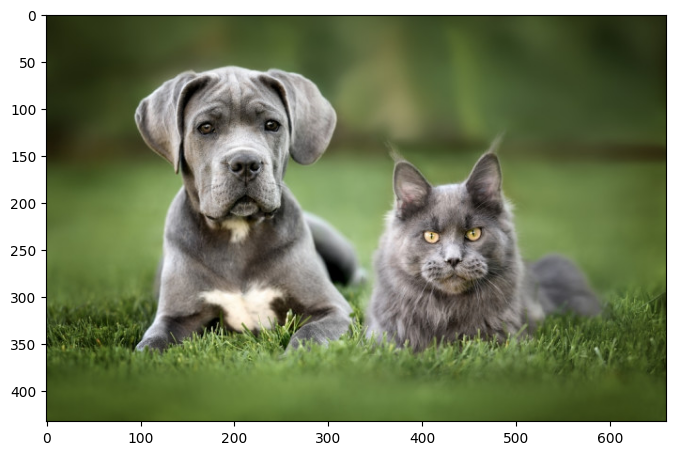

In [89]:
# Show image
plt.rcParams['figure.figsize'] = (8, 8)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.show()

In [90]:
# Prepare input blob
blob = cv2.dnn.blobFromImage(image, 1 / 255.0, (416, 416), swapRB=True, crop=False)
print(blob.shape)  # Should be (1, 3, 416, 416)


(1, 3, 416, 416)


In [91]:
# Forward pass
net.setInput(blob)
t1 = time.time()
outputs = net.forward(output_layers)
t2 = time.time()
print(f'YOLO took {t2 - t1:.5f} seconds')


YOLO took 3.31021 seconds


In [92]:
# Output shapes
for i, output in enumerate(outputs):
    print(f"Output layer {i} shape: {output.shape}")

Output layer 0 shape: (507, 85)
Output layer 1 shape: (2028, 85)
Output layer 2 shape: (8112, 85)


In [93]:
# Post-process function
def post_process(outputs, image_shape, conf_threshold=0.5, nms_threshold=0.4):
    height, width = image_shape[:2]
    boxes = []
    confidences = []
    class_ids = []

    for output in outputs:
        for detection in output:
            scores = detection[5:]
            if len(scores) > 0:  # Debugging: Check if scores exist
                class_id = np.argmax(scores)
                confidence = scores[class_id]

                if confidence > conf_threshold:
                    # Convert from center x, center y, w, h to x, y, w, h
                    center_x, center_y, w, h = detection[0:4]
                    x = int(center_x * width - w * width / 2)
                    y = int(center_y * height - h * height / 2)
                    w = int(w * width)
                    h = int(h * height)

                    boxes.append([x, y, w, h])
                    confidences.append(float(confidence))
                    class_ids.append(class_id)

    indices = cv2.dnn.NMSBoxes(boxes, confidences, conf_threshold, nms_threshold)

    if len(indices) > 0:
        indices = indices.flatten()  # Flatten indices to a 1D array if necessary
        return [(boxes[i], confidences[i], class_ids[i]) for i in indices]
    else:
        return []

In [94]:
# Process detections
detections = post_process(outputs, image.shape)
print(f'Detections: {detections}')  # Debugging: Print detections
for (x, y, w, h), conf, class_id in detections:
    cv2.rectangle(image, (x, y), (x+w, y+h), (0, 255, 0), 2)
    cv2.putText(image, f'Class {class_id} Conf: {conf:.2f}', (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

Detections: [([88, 58, 250, 301], 0.9992983937263489, 16), ([347, 130, 277, 233], 0.9130646586418152, 15)]


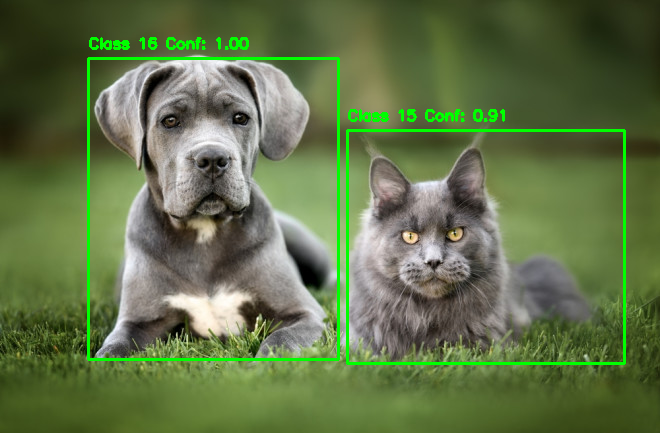

In [95]:
# Show result
cv2_imshow(image)